In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

# Preparing the Data


In [2]:
kddCupTrain = pd.read_csv('KddCupData/kddCupTrain.csv',header=None)
print("Shape of kddCupTrain: ",kddCupTrain.shape)
print("There are any missing values: ", kddCupTrain.isnull().values.any())
print(kddCupTrain.head(3))

Shape of kddCupTrain:  (985262, 42)
There are any missing values:  False
   0    1     2   3    4      5   6   7   8   9   ...  32   33   34   35   36  \
0   0  tcp  http  SF  215  45076   0   0   0   0  ...   0  0.0  0.0  0.0  0.0   
1   0  tcp  http  SF  162   4528   0   0   0   0  ...   1  1.0  0.0  1.0  0.0   
2   0  tcp  http  SF  236   1228   0   0   0   0  ...   2  1.0  0.0  0.5  0.0   

    37   38   39   40       41  
0  0.0  0.0  0.0  0.0  normal.  
1  0.0  0.0  0.0  0.0  normal.  
2  0.0  0.0  0.0  0.0  normal.  

[3 rows x 42 columns]


In [3]:
kddCupTrain.iloc[:,-1].unique()

array(['normal.', 'ipsweep.'], dtype=object)

In [4]:
kddCupTrain.rename(columns={41:'Class'}, inplace=True)
kddCupTrain['Class'] = np.where(kddCupTrain['Class'] == 'normal.', 0, 1)

In [5]:
count_classes = pd.value_counts(kddCupTrain['Class'], sort = True)
print(count_classes)

0    972781
1     12481
Name: Class, dtype: int64


# Remove the uninformative columns

In [6]:
print(kddCupTrain.describe(percentiles=[]))

                   0             4             5              6         7  \
count  985262.000000  9.852620e+05  9.852620e+05  985262.000000  985262.0   
mean      215.078631  1.459258e+03  3.193730e+03       0.000007       0.0   
std      1343.633640  1.097984e+05  3.401613e+04       0.002665       0.0   
min         0.000000  0.000000e+00  0.000000e+00       0.000000       0.0   
50%         0.000000  2.300000e+02  4.060000e+02       0.000000       0.0   
max     58329.000000  8.958152e+07  1.173059e+07       1.000000       0.0   

                   8              9             10             11  \
count  985262.000000  985262.000000  985262.000000  985262.000000   
mean        0.000036       0.048908       0.000097       0.710185   
std         0.015897       0.926008       0.013058       0.453677   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       1.000000   
max        14.000000      77.000000       4.00

In [7]:
columnsList = [19,7]

In [8]:
kddCupTrain.drop(columnsList, axis=1, inplace=True)

# Transform symbolic features to "One Hot" columns


In [9]:
kddCupTrain = pd.get_dummies(kddCupTrain, columns = [1,2,3])

In [10]:
kddCupTrain.head(2)

,0,4,5,6,8,9,10,11,12,13,...,3_OTH,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH
0,0,215,45076,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,162,4528,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
kddCupTrain.shape

(985262, 84)

# Standardize the training dataset

In [12]:
featuresList = [col for col in kddCupTrain if col != 'Class']

In [13]:
scaler = preprocessing.StandardScaler()
scaler.fit(kddCupTrain[featuresList]);

In [14]:
kddCupTrain[featuresList] = scaler.transform(kddCupTrain[featuresList])
kddCupTrain.head()

,0,4,5,6,8,9,10,11,12,13,...,3_OTH,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH
0,-0.160072,-0.011332,1.231248,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,-0.003632,-0.2415,-0.025415,-0.018415,-0.020749,-0.023156,-0.012462,-0.006833,0.246487,-0.001425
1,-0.160072,-0.011815,0.039225,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,-0.003632,-0.2415,-0.025415,-0.018415,-0.020749,-0.023156,-0.012462,-0.006833,0.246487,-0.001425
2,-0.160072,-0.011141,-0.057788,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,-0.003632,-0.2415,-0.025415,-0.018415,-0.020749,-0.023156,-0.012462,-0.006833,0.246487,-0.001425
3,-0.160072,-0.011168,-0.034152,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,-0.003632,-0.2415,-0.025415,-0.018415,-0.020749,-0.023156,-0.012462,-0.006833,0.246487,-0.001425
4,-0.160072,-0.011114,-0.079601,-0.002665,-0.002235,-0.052816,-0.007462,0.638815,-0.004408,-0.01751,...,-0.003632,-0.2415,-0.025415,-0.018415,-0.020749,-0.023156,-0.012462,-0.006833,0.246487,-0.001425


In [32]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import h5py
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# Split the data into train and test subsets

In [23]:
X_train_split, X_test_split = train_test_split(kddCupTrain, test_size=0.2,
                                   stratify=kddCupTrain['Class'], 
                                   random_state=RANDOM_SEED)

# Detach the labels from the train and the test datasets


In [24]:
y_train = X_train_split['Class']
X_train = X_train_split.drop(['Class'], axis=1)

y_test = X_test_split['Class']
X_test = X_test_split.drop(['Class'], axis=1)
print('Train: shape X',X_train.shape,', shape Y',y_train.shape)
print('Test: shape X',X_test.shape,', shape Y',y_test.shape)

Train: shape X (788209, 83) , shape Y (788209,)
Test: shape X (197053, 83) , shape Y (197053,)


# Separate the "normal" instances

In [25]:
X_trainNorm = X_train[y_train == 0]
X_trainNorm_val = X_trainNorm.values # Only values, axis labels removed. This is input for the Autoencoder
X_testNorm_val = X_test[y_test == 0].values # The validation data

In [26]:
print(y_train.shape)
print(X_train.shape)

(788209,)
(788209, 83)


In [27]:
X_trainNorm_val.shape

(778224, 83)

# Build the model


# Select architecture of autoencoder

In [28]:
input_dim = X_trainNorm_val.shape[1]
layer1_dim = 14
encoder_dim = 7

In [33]:
input_layer = Input(shape=(input_dim, ))

encoder1 = Dense(layer1_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder2 = Dense(encoder_dim, activation="relu")(encoder1)
encoder2 = BatchNormalization()(encoder2)
encoder2 = Dropout(rate=0.3)(encoder2)
decoder1 = Dense(layer1_dim, activation='tanh')(encoder2)
decoder2 = Dense(input_dim, activation='linear')(decoder1)
print('input_layer: ',input_layer)
print('encoder1',encoder1)
print('encoder2',encoder2)
print('decoder1',decoder1)
print('decoder2',decoder2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
input_layer:  Tensor("input_3:0", shape=(?, 83), dtype=float32)
encoder1 Tensor("dense_7/Tanh:0", shape=(?, 14), dtype=float32)
encoder2 Tensor("dropout_1/cond/Merge:0", shape=(?, 7), dtype=float32)
decoder1 Tensor("dense_9/Tanh:0", shape=(?, 14), dtype=float32)
decoder2 Tensor("dense_10/BiasAdd:0", shape=(?, 83), dtype=float32)


In [34]:
autoencoder = Model(inputs=input_layer, outputs=decoder2)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 83)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 14)                1176      
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 105       
_________________________________________________________________
batch_normalization_1 (Batch (None, 7)                 28        
_________________________________________________________________
dropout_1 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_10 (Dense)             (None, 83)                1245      
Total para

# Fit the model

In [36]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')

checkpointer = ModelCheckpoint(filepath="autoencoder.h5",
                               verbose=0,
                               save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=1, verbose=0) # 'patience' number of not improving epochs
history = autoencoder.fit(X_trainNorm_val, X_trainNorm_val,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_testNorm_val, X_testNorm_val),
                    verbose=1,
                    callbacks=[checkpointer, #tensorboard, 
                               earlystopping]).history

Train on 778224 samples, validate on 194557 samples
Epoch 1/100
778224/778224 [==============================] - 53s 68us/step - loss: 0.6111 - val_loss: 0.5562
Epoch 2/100
778224/778224 [==============================] - 53s 68us/step - loss: 0.6094 - val_loss: 0.5561
Epoch 3/100
778224/778224 [==============================] - 50s 64us/step - loss: 0.6083 - val_loss: 0.5488
Epoch 4/100
778224/778224 [==============================] - 49s 64us/step - loss: 0.6083 - val_loss: 0.5499


# Load the fitted autoencoder

In [37]:
autoencoder = load_model('autoencoder.h5')

In [38]:
testPredictions = autoencoder.predict(X_test)
X_test.shape,testPredictions.shape

((197053, 83), (197053, 83))

In [39]:
testMSE = mean_squared_error(X_test.transpose(), testPredictions.transpose(),
                              multioutput='raw_values')
error_df = pd.DataFrame({'reconstruction_error': testMSE,'true_class': y_test})
error_df.head()

,reconstruction_error,true_class
940543,1.348720,1
356110,0.092566,0
540178,0.005591,0
672514,0.018961,0
244980,0.004376,0


In [40]:
error_df.shape

(197053, 2)

In [41]:
error_df.reconstruction_error.describe()

count    197053.000000
mean          0.654718
std          31.462464
min           0.001419
25%           0.020034
50%           0.027897
75%           0.085133
max        8627.359070
Name: reconstruction_error, dtype: float64

# Evaluation

In [42]:
from sklearn.metrics import (confusion_matrix, auc, roc_curve, cohen_kappa_score, accuracy_score)

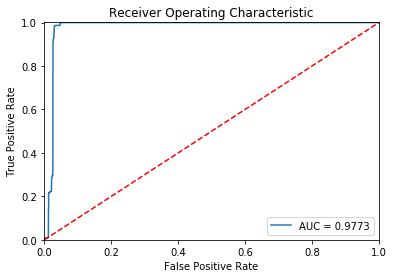

In [43]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

# Create submission

In [67]:
kddCupTest = pd.read_csv('KddCupData/kddCupTest.csv', header=None)
print(kddCupTest.head(3))

   0    1        2   3     4      5   6   7   8   9   ...   31   32    33  \
0   0  tcp     http  SF   230  10066   0   0   0   0  ...  255  255  1.00   
1   0  udp  private  SF   105    145   0   0   0   0  ...  255  227  0.89   
2   1  tcp     smtp  SF  1888    374   0   0   0   0  ...  255  174  0.68   

     34   35   36   37   38   39   40  
0  0.00  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.01  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.03  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 41 columns]


# Do "One hot" transformation of categorical features

In [68]:
columnsList = [19,7]
kddCupTest.drop(columnsList, axis=1, inplace=True)
kddCupTest = pd.get_dummies(kddCupTest, columns = [1,2,3])

In [69]:
featuresList1 = [col for col in kddCupTrain if col != 'Class']

In [70]:
missing_cols = set(kddCupTrain[featuresList1]) - set(kddCupTest.columns)
print('missing_cols: ',missing_cols)
for c in missing_cols:
    kddCupTest[c] = 0
kddCupTest = kddCupTest[featuresList1].copy()
kddCupTest.head(2)

missing_cols:  {'3_SH', '2_tftp_u'}


,0,4,5,6,8,9,10,11,12,13,...,3_OTH,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH
0,0,230,10066,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,105,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Standardize the test dataset

In [71]:
featuresList2 = [col for col in kddCupTest]

In [72]:
scaler = preprocessing.StandardScaler()
scaler.fit(kddCupTest[featuresList2]);


In [73]:
kddCupTest[featuresList2] = scaler.transform(kddCupTest[featuresList2])
kddCupTest.head()

,0,4,5,6,8,9,10,11,12,13,...,3_OTH,3_REJ,3_RSTO,3_RSTR,3_S0,3_S1,3_S2,3_S3,3_SF,3_SH
0,-0.161814,-0.021112,0.213319,0.0,-0.0034,-0.051868,-0.007121,0.636295,-0.006817,-0.016577,...,-0.003907,-0.262899,-0.025427,-0.017763,-0.032937,-0.024613,-0.01276,-0.007133,0.269105,0.0
1,-0.161814,-0.023648,-0.095420,0.0,-0.0034,-0.051868,-0.007121,-1.571597,-0.006817,-0.016577,...,-0.003907,-0.262899,-0.025427,-0.017763,-0.032937,-0.024613,-0.01276,-0.007133,0.269105,0.0
2,-0.161069,0.012523,-0.088293,0.0,-0.0034,-0.051868,-0.007121,0.636295,-0.006817,-0.016577,...,-0.003907,-0.262899,-0.025427,-0.017763,-0.032937,-0.024613,-0.01276,-0.007133,0.269105,0.0
3,-0.161814,-0.019083,-0.053968,0.0,-0.0034,-0.051868,-0.007121,0.636295,-0.006817,-0.016577,...,-0.003907,-0.262899,-0.025427,-0.017763,-0.032937,-0.024613,-0.01276,-0.007133,0.269105,0.0
4,1.794381,-0.022816,-0.096664,0.0,-0.0034,-0.051868,-0.007121,-1.571597,-0.006817,-0.016577,...,-0.003907,-0.262899,-0.025427,-0.017763,-0.032937,-0.024613,-0.01276,-0.007133,0.269105,0.0


In [74]:
kddCupTest.shape

(196557, 83)

# Make predictions and save the results to csv file

In [75]:
testPredictions1 = autoencoder.predict(kddCupTest)
kddCupTest.shape,kddCupTest.shape

((196557, 83), (196557, 83))

In [76]:
testMSE = mean_squared_error(kddCupTest.transpose(), testPredictions1.transpose(),
                              multioutput='raw_values')

In [78]:
result_df = pd.DataFrame({'reconstruction_error': testMSE})
result_df.to_csv('filename.csv')